In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('solar-radiation-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,mean_relative_humidity,percentage_possible_sunshine,total_sunshine_duration,solar_radiation
0,Jan-10,75.5,-3.4,5.5,75,14,40.4,8.1
1,Feb-10,109.5,-4.9,4.1,74,17,48.8,9.1
2,Mar-10,100.5,-1.4,4.7,68,29,108.0,12.2
3,Apr-10,94.0,3.5,4.3,77,36,146.2,14.5
4,May-10,76.5,7.3,4.9,86,37,168.6,19.2


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.7673280318719918


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[10.09254531  9.00231526 11.80087835 14.85510929 18.92367425 19.76894649
 12.26049692 16.16359412 13.35719367 10.42662991  8.48033003  9.54882565
  9.56556469  8.43419185 12.49146905 15.5082702  17.2193629  15.80188226
 15.57133669 15.5433644  13.36393833 10.45557066  7.88764411  9.20053616
  8.9559818   9.53616749 12.86887869 16.39372464 16.04358225 19.74497889
 14.96869058 14.91178743 12.13616329  9.70959691  9.90586592  9.56227357
  9.94280089  9.54105585 12.0645058  15.482072   15.608992   18.24430861
 19.5372591  13.58546915 11.75609458 10.66083029  7.6175111   9.09528793
  8.28293754  9.71825376 14.60474616 18.19601622 16.97182713 17.75047325
 17.13503135 16.3570999  12.87913531  9.78395825  7.5466658   9.00073298
  9.01822549 10.26586685 13.43712417 15.7732154  17.91535543 15.90057314
 15.55543365 14.20727422 12.80450062  9.9670788   8.07028815  6.96530602
  8.30623215  8.83581398 11.70467164 15.43495716 20.43317545 17.27610678
 17.52938452 15.89085523 12.93

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.6091731428535254
Mean Squared Error: 4.289691479609486
Root Mean Squared Error: 2.071157038857625


Text(0.5, 1.0, 'Solar radiation - actual and predicted values')

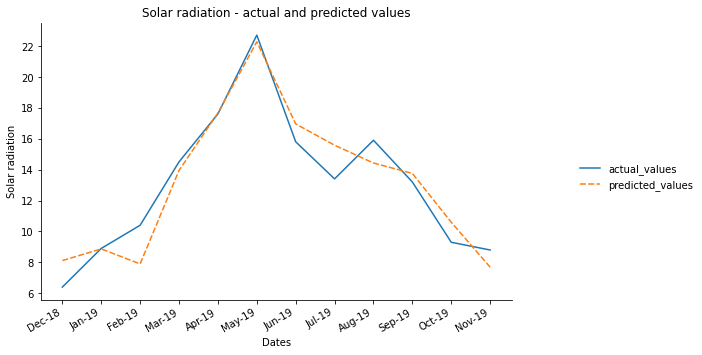

In [12]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Solar radiation') #set the label for the y-axis
plt.title('Solar radiation - actual and predicted values') #set the title of the graph